In [1]:
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PlotFuncs import *
from LabFuncs import *
from Params import *
from HaloFuncs import *
from scipy.stats import norm
import pandas
import cmocean
from copy import copy


df = pandas.read_csv('../data/Gaia-SDSS.csv')
df_S = pandas.read_csv('../data/GAIA_SDSS_Shards.csv')
names = df_S.group_id.unique()

In [2]:
# Extract halo
means_init = zeros(shape=(3,4))
means_init[0,:] = array([0.0,0.0,0.0,-1.4]) # Sausage
means_init[1,:] = array([0.0,0.0,0.0,-2.0]) # Halo
means_init[2,:] = array([0.0,126.0,0.0,-1.8]) # Halo
weights_init = array([0.5,0.34,0.16])
covariance_type = 'full'
data = array([df.GalRVel,df.GalphiVel,df.GalzVel,df.feh]).T
clf = mixture.GaussianMixture(n_components=3, covariance_type=covariance_type,
                              weights_init=weights_init,means_init=means_init,tol=1e-12,reg_covar=1e-8,max_iter=1000)
clf.fit(data)
Ps = clf.predict_proba(data)
meens = clf.means_
covs = clf.covariances_
ws = clf.weights_
eta = ws[0]

Ps = clf.predict_proba(data)

In [90]:
n = 200
prob1 = logspace(-3.0,0.0,n)
prob3 = logspace(-3.0,0.0,n)
beta = zeros(shape=(n,n))
fehmean = zeros(shape=(n,n))
vphimean = zeros(shape=(n,n))
nstars = zeros(shape=(n,n))
for i in range(0,n):
    for j in range(0,n):
        imod = (Ps[:,0]<prob1[j])&(Ps[:,2]<prob3[i])
        df2 = df.loc[imod]
        sigr = std(df2.GalRVel)
        sigphi = std(df2.GalphiVel)
        sigz = std(df2.GalzVel)
        beta[i,j] = 1.0-(sigz**2.0+sigphi**2.0)/(2*sigr**2.0)
        fehmean[i,j] = mean(df2.feh)
        vphimean[i,j] = mean(df2.GalphiVel)
        nstars[i,j] = sum(imod)*1.0
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


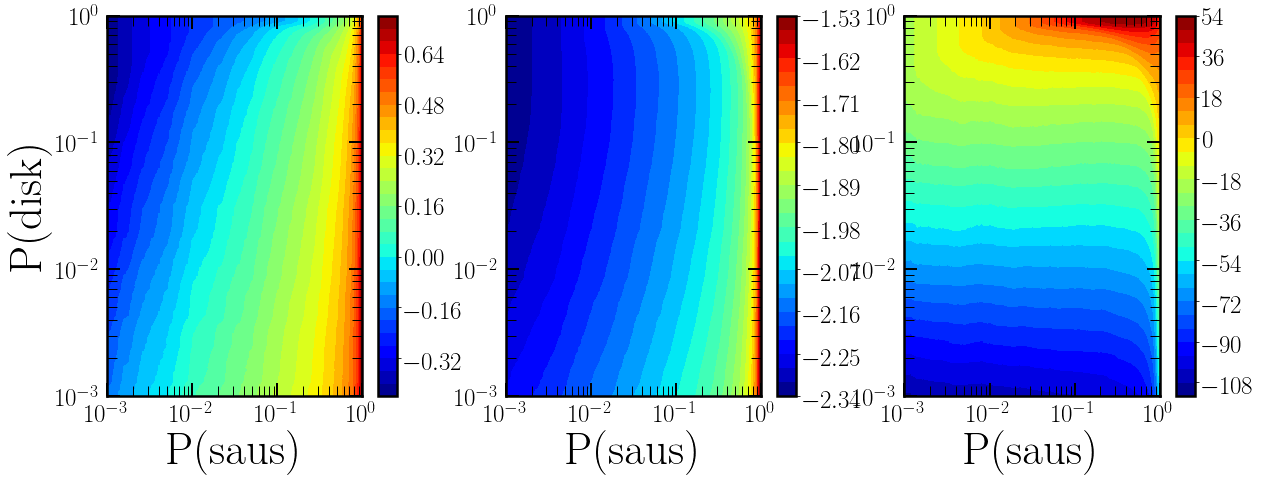

In [91]:
fig,ax1,ax2,ax3 = MyTriplePlot('P(saus)','P(disk)','P(saus)','','P(saus)','')

ax1.set_xlim([prob1[0],prob1[-1]])
ax2.set_xlim([prob1[0],prob1[-1]])
ax3.set_xlim([prob1[0],prob1[-1]])

ax1.set_ylim([prob3[0],prob3[-1]])
ax2.set_ylim([prob3[0],prob3[-1]])
ax3.set_ylim([prob3[0],prob3[-1]])

plt.sca(ax1)
plt.contourf(prob1,prob3,beta,30,cmap=cm.jet)
plt.colorbar()

plt.sca(ax2)
plt.contourf(prob1,prob3,fehmean,30,cmap=cm.jet)
plt.colorbar()

plt.sca(ax3)
plt.contourf(prob1,prob3,vphimean,30,cmap=cm.jet)
plt.colorbar()

ax1.set_yscale('log')
ax1.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xscale('log')
ax3.set_yscale('log')
ax3.set_xscale('log')


plt.show()

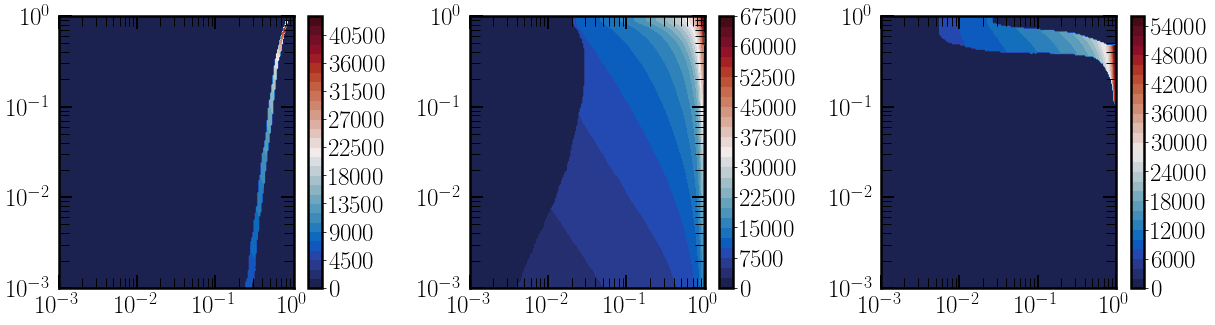

In [92]:
fig,ax1,ax2,ax3 = MyTriplePlot(size_y=5,wspace=0.4)

ax1.set_xlim([prob1[0],prob1[-1]])
ax2.set_xlim([prob1[0],prob1[-1]])
ax3.set_xlim([prob1[0],prob1[-1]])

ax1.set_ylim([prob3[0],prob3[-1]])
ax2.set_ylim([prob3[0],prob3[-1]])
ax3.set_ylim([prob3[0],prob3[-1]])


beta_halo = 1.0-(covs[1,1,1]+covs[1,2,2])/(2*covs[1,0,0])
feh_halo = meens[1,3]
vphi_halo = meens[1,1]

vphi_cond = (abs(vphimean-vphi_halo)<10.0)
feh_cond = (abs(fehmean-feh_halo)<0.3)
beta_cond = (abs(beta-beta_halo)<0.01)
cond = vphi_cond*feh_cond*beta_cond


plt.sca(ax1)
plt.contourf(prob1,prob3,beta_cond*nstars,30,cmap=cmocean.cm.balance)
plt.colorbar()

plt.sca(ax2)
plt.contourf(prob1,prob3,feh_cond*nstars,30,cmap=cmocean.cm.balance)
plt.colorbar()

plt.sca(ax3)
plt.contourf(prob1,prob3,vphi_cond*nstars,30,cmap=cmocean.cm.balance)
plt.colorbar()

ax1.set_yscale('log')
ax1.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xscale('log')
ax3.set_yscale('log')
ax3.set_xscale('log')


plt.show()

saus prob =  0.6826071834272386 disk prob =  0.4347013158125022


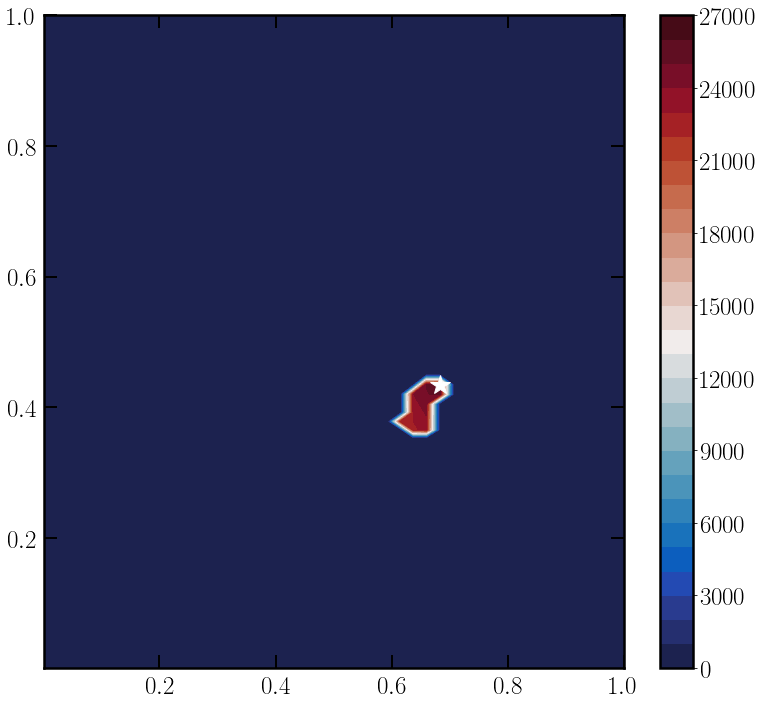

In [128]:
fig,ax1 = MySquarePlot()

ax1.set_xlim([prob1[0],prob1[-1]])
ax1.set_ylim([prob3[0],prob3[-1]])

vphi_cond = (abs(vphimean-vphi_halo)<5.0)
feh_cond = (abs(fehmean-feh_halo)<0.1)
beta_cond = (abs(beta-beta_halo)<0.01)
cond = vphi_cond*feh_cond*beta_cond

N = vphi_cond*feh_cond*beta_cond*nstars

plt.sca(ax1)
plt.contourf(prob1,prob3,N,30,cmap=cmocean.cm.balance)
plt.colorbar()

imax,jmax = unravel_index(argmax(N),(n,n))
ax1.plot(prob1[jmax],prob3[imax],'w*',markersize=20)

#ax1.set_yscale('log')
#ax1.set_xscale('log')

print('saus prob = ',prob1[jmax],'disk prob = ',prob3[imax])

plt.show()

In [175]:
#df_shardsless = pandas.read_csv('../data/Gaia-SDSS.csv')
shards_ix = []
for i in range(0,size(names)):
    namei = names[i]
    Cand = df_S.loc[df_S['group_id'] == namei]
    Cand_matched = df.loc[around(df.ra,8).isin(Cand.ra)]
    shards_ix = append(shards_ix,Cand_matched.index.values)

df_shardsless = df[~df.index.isin(shards_ix)]
df_S_full = df[df.index.isin(shards_ix)]

In [174]:
# Extract halo
means_init = zeros(shape=(3,4))
means_init[0,:] = array([0.0,0.0,0.0,-1.4]) # Sausage
means_init[1,:] = array([0.0,0.0,0.0,-2.0]) # Halo
means_init[2,:] = array([0.0,126.0,0.0,-1.8]) # Halo
weights_init = array([0.5,0.34,0.16])
covariance_type = 'full'
data = array([df_shardsless.GalRVel,df_shardsless.GalphiVel,df_shardsless.GalzVel,df_shardsless.feh]).T
clf = mixture.GaussianMixture(n_components=3, covariance_type=covariance_type,
                              weights_init=weights_init,means_init=means_init,tol=1e-12,reg_covar=1e-8,max_iter=1000)
clf.fit(data)
Ps = clf.predict_proba(data)
meens = clf.means_
covs = clf.covariances_
ws = clf.weights_
eta = ws[0]

Ps = clf.predict_proba(data)



print("Sausage")
print("%.2f ± %.2f" % (meens[0,0],sqrt(covs[0,0,0])))
print("%.2f ± %.2f" % (meens[0,1],sqrt(covs[0,1,1])))
print("%.2f ± %.2f" % (meens[0,2],sqrt(covs[0,2,2])))
print("%.2f ± %.2f" % (meens[0,3],sqrt(covs[0,3,3])))
print(sqrt(covs[0,:,:]*(covs[0,:,:]>.0)))

print("")
print("Halo")
print("%.2f ± %.2f" % (meens[1,0],sqrt(covs[1,0,0])))
print("%.2f ± %.2f" % (meens[1,1],sqrt(covs[1,1,1])))
print("%.2f ± %.2f" % (meens[1,2],sqrt(covs[1,2,2])))
print("%.2f ± %.2f" % (meens[1,3],sqrt(covs[1,3,3])))
print(sqrt(covs[1,:,:]*(covs[1,:,:]>.0)))

print("")
print("Disk")
print("%.2f ± %.2f" % (meens[2,0],sqrt(covs[2,0,0])))
print("%.2f ± %.2f" % (meens[2,1],sqrt(covs[2,1,1])))
print("%.2f ± %.2f" % (meens[2,2],sqrt(covs[2,2,2])))
print("%.2f ± %.2f" % (meens[2,3],sqrt(covs[2,3,3])))
print(sqrt(covs[2,:,:]*(covs[2,:,:]>.0)))

print(ws)

Sausage
-8.66 ± 157.65
25.46 ± 60.78
0.43 ± 80.92
-1.39 ± 0.23
[[157.64991266  -0.          60.81107583   0.7231372 ]
 [ -0.          60.78276629  -0.          -0.        ]
 [ 60.81107583  -0.          80.91507766   0.54852579]
 [  0.7231372   -0.           0.54852579   0.23342595]]

Halo
1.10 ± 143.10
7.66 ± 116.64
8.32 ± 109.28
-1.90 ± 0.40
[[143.10114846  -0.          42.58322438   1.30630163]
 [ -0.         116.63695294  -0.          -0.        ]
 [ 42.58322438  -0.         109.28391415   1.24480593]
 [  1.30630163  -0.           1.24480593   0.39853552]]

Disk
13.98 ± 74.89
132.16 ± 47.78
4.29 ± 62.11
-1.64 ± 0.26
[[74.88805795  3.52319659 28.63278783 -0.        ]
 [ 3.52319659 47.77717056 -0.          0.76110051]
 [28.63278783 -0.         62.1057096   0.28260695]
 [-0.          0.76110051  0.28260695  0.26486135]]
[0.51368261 0.33540364 0.15091375]


In [151]:
# Extract halo
means_init = zeros(shape=(3,4))
means_init[0,:] = array([0.0,0.0,0.0,-1.4]) # Sausage
means_init[1,:] = array([0.0,0.0,0.0,-2.0]) # Halo
means_init[2,:] = array([0.0,126.0,0.0,-1.8]) # Halo
weights_init = array([0.5,0.34,0.16])
covariance_type = 'full'
data = array([df.GalRVel,df.GalphiVel,df.GalzVel,df.feh]).T
clf = mixture.GaussianMixture(n_components=3, covariance_type=covariance_type,
                              weights_init=weights_init,means_init=means_init,tol=1e-12,reg_covar=1e-8,max_iter=1000)
clf.fit(data)
Ps = clf.predict_proba(data)
meens = clf.means_
covs = clf.covariances_
ws = clf.weights_
eta = ws[0]

Ps = clf.predict_proba(data)



print("Sausage")
print("%.2f ± %.2f" % (meens[0,0],sqrt(covs[0,0,0])))
print("%.2f ± %.2f" % (meens[0,1],sqrt(covs[0,1,1])))
print("%.2f ± %.2f" % (meens[0,2],sqrt(covs[0,2,2])))
print("%.2f ± %.2f" % (meens[0,3],sqrt(covs[0,3,3])))
print(sqrt(covs[0,:,:]*(covs[0,:,:]>.0)))

print("")
print("Halo")
print("%.2f ± %.2f" % (meens[1,0],sqrt(covs[1,0,0])))
print("%.2f ± %.2f" % (meens[1,1],sqrt(covs[1,1,1])))
print("%.2f ± %.2f" % (meens[1,2],sqrt(covs[1,2,2])))
print("%.2f ± %.2f" % (meens[1,3],sqrt(covs[1,3,3])))
print(sqrt(covs[1,:,:]*(covs[1,:,:]>.0)))

print("")
print("Disk")

print("%.2f ± %.2f" % (meens[2,0],sqrt(covs[2,0,0])))
print("%.2f ± %.2f" % (meens[2,1],sqrt(covs[2,1,1])))
print("%.2f ± %.2f" % (meens[2,2],sqrt(covs[2,2,2])))
print("%.2f ± %.2f" % (meens[2,3],sqrt(covs[2,3,3])))
print(sqrt(covs[2,:,:]*(covs[2,:,:]>.0)))

print(ws)

Sausage
-8.17 ± 158.93
25.72 ± 61.50
0.99 ± 80.86
-1.39 ± 0.23
[[158.93219583  -0.          61.64547998   0.64040058]
 [ -0.          61.50275912  -0.          -0.        ]
 [ 61.64547998  -0.          80.86372702   0.47118498]
 [  0.64040058  -0.           0.47118498   0.23117556]]

Halo
-0.06 ± 144.44
5.97 ± 120.03
8.03 ± 115.67
-1.90 ± 0.40
[[144.44255138  -0.          39.30495381   1.26824424]
 [ -0.         120.03195329  -0.          -0.        ]
 [ 39.30495381  -0.         115.66973437   1.30481002]
 [  1.26824424  -0.           1.30481002   0.39917568]]

Disk
12.37 ± 76.75
128.78 ± 50.13
3.57 ± 62.69
-1.67 ± 0.27
[[76.75068239 10.36023545 30.12016285 -0.        ]
 [10.36023545 50.12568937 -0.          1.24266798]
 [30.12016285 -0.         62.69161941  0.14148534]
 [-0.          1.24266798  0.14148534  0.27144356]]
[0.50899714 0.33492133 0.15608153]


In [155]:
from sklearn.neighbors.kde import KernelDensity
from sklearn import preprocessing

#imod = (Ps[:,1]>0.8)
imod = argmax(Ps,axis=1)
df2 = df_shardsless.loc[imod==1]

JR = log10(df2.JR.values)
Jphi = df2.Jphi.values
Jz = log10(df2.Jz.values)
E = df2.E.values
data = array([JR,Jphi,Jz,E]).T
scale = preprocessing.MinMaxScaler()
data_s = scale.fit_transform(data)

bw = 0.02
kde = KernelDensity(kernel='gaussian', bandwidth=bw).fit(data_s)
L = kde.score_samples(data_s)
L -= amax(L)
L *= 2.0

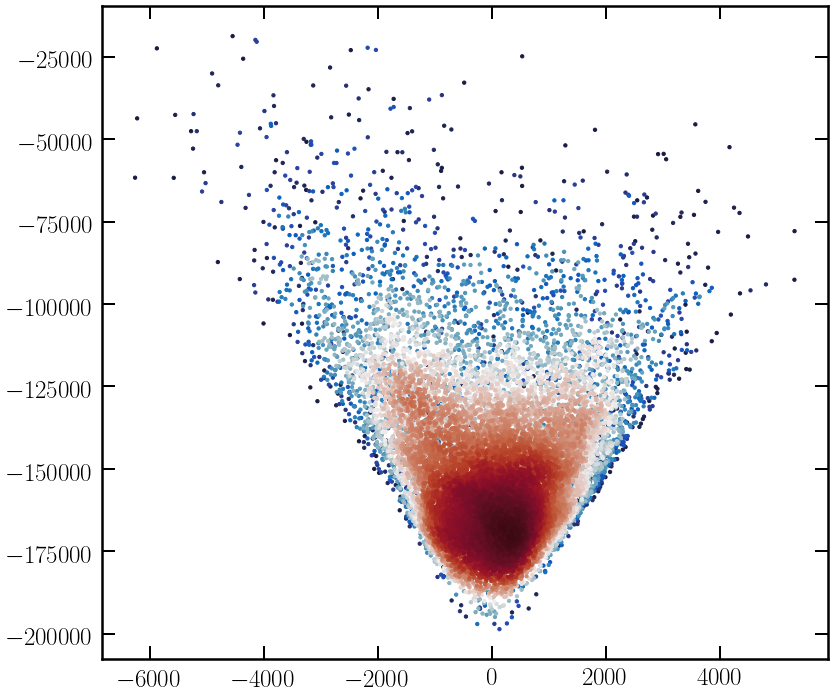

In [157]:
fig,ax1 = MySquarePlot('','')

isort = argsort(L)
ax1.scatter(Jphi[isort],E[isort],c=L[isort],s=11,rasterized=True,cmap=cmocean.cm.balance)
plt.show()


In [178]:
# Extract parts
means_init = zeros(shape=(3,4))
means_init[0,:] = array([0.0,0.0,0.0,-1.4]) # Sausage
means_init[1,:] = array([0.0,0.0,0.0,-2.0]) # Halo
means_init[2,:] = array([0.0,126.0,0.0,-1.8]) # Halo
weights_init = array([0.5,0.34,0.16])
covariance_type = 'full'
data = array([df_shardsless.GalRVel,df_shardsless.GalphiVel,df_shardsless.GalzVel,df_shardsless.feh]).T
clf = mixture.GaussianMixture(n_components=3, covariance_type=covariance_type,
                              weights_init=weights_init,means_init=means_init,tol=1e-12,reg_covar=1e-8,max_iter=1000)
clf.fit(data)
Ps = clf.predict_proba(data)
imod = argmax(Ps,axis=1)
df1 = df_shardsless.loc[imod==0]
df2 = df_shardsless.loc[imod==1]
df3 = df_shardsless.loc[imod==2]



(1, 57)
(813, 57)
(261, 57)


(0, 57)
(650, 57)
(425, 57)


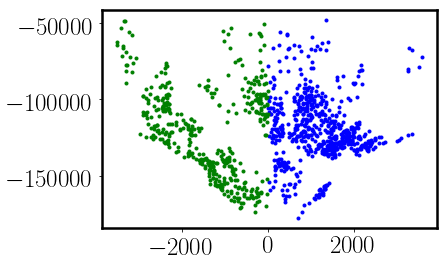

In [210]:
data1 = array([log10(df1.JR.values),df1.Jphi.values,log10(df1.Jz.values),df1.E.values]).T
data2 = array([log10(df2.JR.values),df2.Jphi.values,log10(df2.Jz.values),df2.E.values]).T
data3 = array([log10(df3.JR.values),df3.Jphi.values,log10(df3.Jz.values),df3.E.values]).T
data_S = array([log10(df_S_full.JR.values),df_S_full.Jphi.values,log10(df_S_full.Jz.values),df_S_full.E.values]).T

scale = preprocessing.MinMaxScaler()

bw = 0.02

kde1 = KernelDensity(kernel='gaussian', bandwidth=bw).fit(scale.fit_transform(data1))
L1 = kde1.score_samples(data_S)

kde2 = KernelDensity(kernel='gaussian', bandwidth=bw).fit(scale.fit_transform(data2))
L2 = kde2.score_samples(data_S)

kde3 = KernelDensity(kernel='gaussian', bandwidth=bw).fit(scale.fit_transform(data3))
L3 = kde3.score_samples(data_S)



Ps = vstack((L1,L2,L3)).T
df_S1 = df_S_full.loc[argmax(Ps,axis=1)==0]
df_S2 = df_S_full.loc[argmax(Ps,axis=1)==1]
df_S3 = df_S_full.loc[argmax(Ps,axis=1)==2]
print(shape(df_S1))
print(shape(df_S2))
print(shape(df_S3))

plt.plot(df_S1.Jphi.values,df_S1.E.values,'r.')
plt.plot(df_S2.Jphi.values,df_S2.E.values,'b.')
plt.plot(df_S3.Jphi.values,df_S3.E.values,'g.')

plt.show()

In [209]:
shae

array([-5.95160418e+13, -5.95160425e+13, -5.95160384e+13])